In [ ]:
#Name : ANINDITA DAS
#Date : 09-07-2022
#GitHub_Link : https://github.com/Anindita2019/Advance_Regression

In [1]:
>> Step 1: Reading and Understanding the Data
# Supress Warnings

import warnings
warnings.filterwarnings('ignore') 

In [18]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os 

In [3]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [10]:
# Importing dataset

HousingDF_Info = pd.read_csv('C:/Users/EASAIND/Downloads/train.csv')     

In [11]:
HousingDF_Info.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
# inspect housingInfo dataframe

#Getting_Info
print(HousingDF_Info.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
#Shape

print(HousingDF_Info.shape) 

(1460, 81)


In [16]:
#Columns having null values

print(HousingDF_Info.isnull().any()) 

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool


In [17]:
#Describe

HousingDF_Info.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:

#checking duplicates
sum(HousingDF_Info.duplicated(subset = 'Id')) == 0 
    

True

In [21]:
# Checking for percentage nulls
round(100*(HousingDF_Info.isnull().sum()/len(HousingDF_Info.index)), 2) 

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [22]:
##Outlier Check

#Checking for outlier in the numerical columns
HousingDF_Info.describe(percentiles=[.25,.5,.75,.90,.95,.99]) 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [23]:
## Method to remove outliers

def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [24]:
#Checking the shape of the dataframe
HousingDF_Info.shape 

(1460, 81)

In [25]:
#Step-2 : DATA CLEANING : Removing null values in Numerical attributes

# since, it is clear that there are multiple columns with high nulls, lets group them together
HousingDF_Info.columns[HousingDF_Info.isnull().any()] 

null = HousingDF_Info.isnull().sum()/len(HousingDF_Info)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null 

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [26]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    HousingDF_Info[i].fillna("none", inplace=True) 

In [27]:
# Check nulls once again

HousingDF_Info.columns[HousingDF_Info.isnull().any()] 

null_2 = HousingDF_Info.isnull().sum()/len(HousingDF_Info)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2 

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [28]:
# Will check these columns one by one
HousingDF_Info['LotFrontage'].describe() 

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [30]:
HousingDF_Info ['GarageYrBlt'].describe() 

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [31]:
HousingDF_Info['MasVnrArea'].describe() 

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [32]:
HousingDF_Info['Electrical'].describe() 

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [33]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

HousingDF_Info['LotFrontage'] = HousingDF_Info.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
HousingDF_Info["GarageYrBlt"].fillna(HousingDF_Info["GarageYrBlt"].median(), inplace=True)
HousingDF_Info["MasVnrArea"].fillna(HousingDF_Info["MasVnrArea"].median(), inplace=True)
HousingDF_Info["Electrical"].dropna(inplace=True) 

In [34]:
# Crosscheck the updated 'LotFrontage' column
HousingDF_Info['LotFrontage'].describe() 

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [35]:
HousingDF_Info['GarageYrBlt'].describe() 

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [36]:
HousingDF_Info['MasVnrArea'].describe() 

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [37]:
HousingDF_Info['Electrical'].describe() 

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [55]:
# Check the no. of rows retained
len(HousingDF_Info.index)
len(HousingDF_Info.index)/1460   
  

1.0

In [40]:
## Some EDA on the cleaned data

HousingDF_Info_numeric = HousingDF_Info.select_dtypes(include=['float64', 'int64'])
HousingDF_Info_numeric.head()  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [41]:
# Dropping ID Column
HousingDF_Info_numeric = HousingDF_Info_numeric.drop(['Id'], axis=1)
HousingDF_Info_numeric.head() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

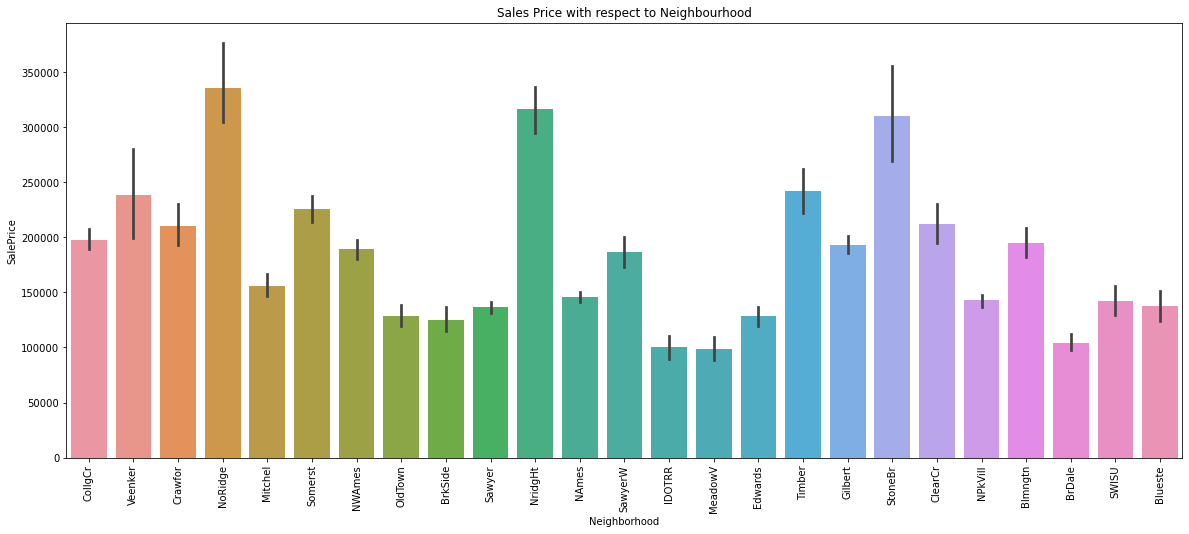

In [44]:
## Step 3: Data Visualization -- Target variable 'sale Price' vs a few select columns

# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= HousingDF_Info)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)   

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

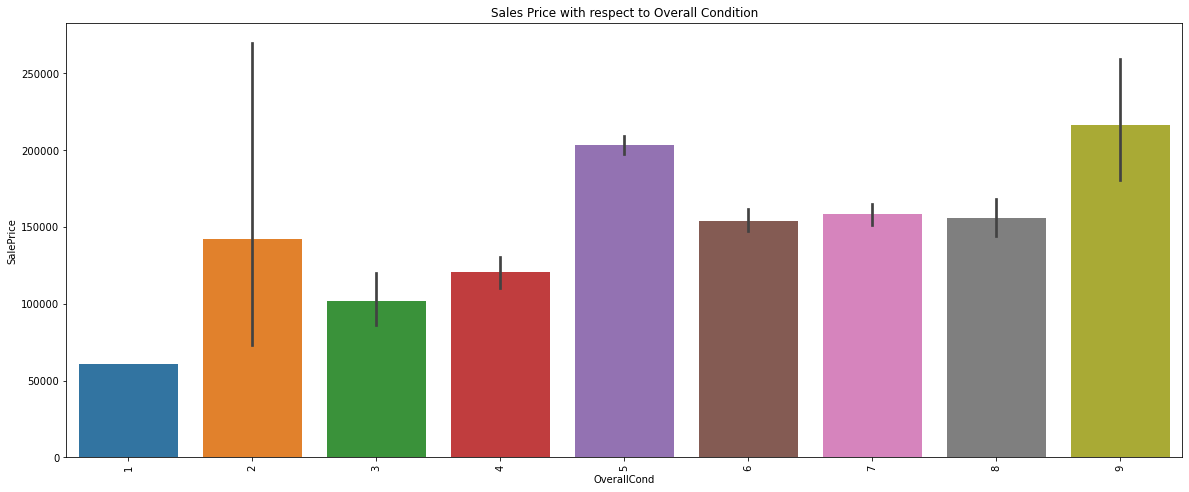

In [45]:
#Properties in some of the Neighborhoods are high priced
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= HousingDF_Info)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

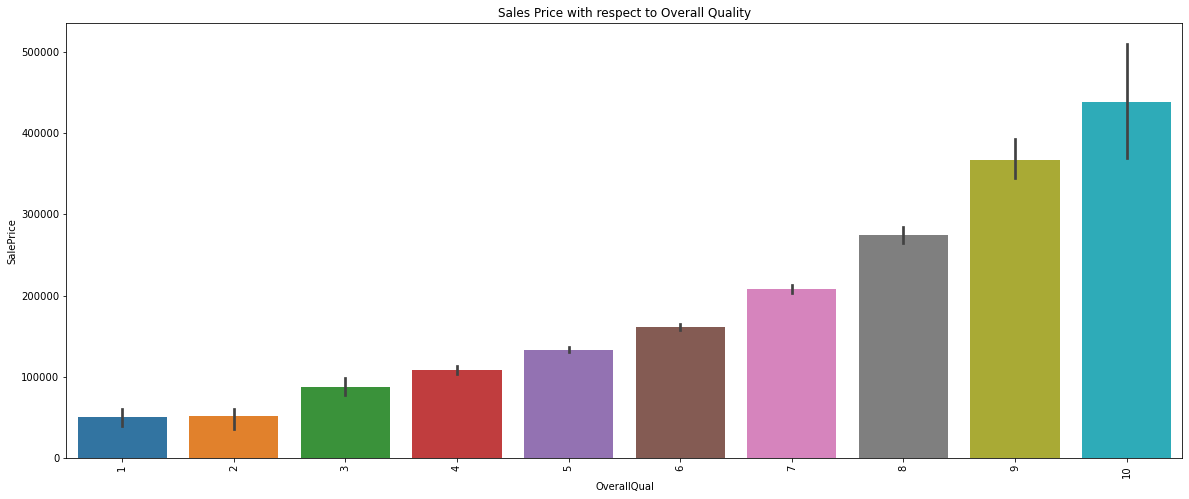

In [46]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= HousingDF_Info)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90) 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

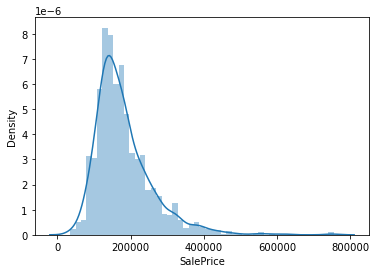

In [47]:
# Increase in the overall quality has a direct positive effect on the sale price
sns.distplot(HousingDF_Info['SalePrice']) 

In [48]:
HousingDF_Info_raw = HousingDF_Info.copy 

In [49]:
#Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data
#Log Transformation
HousingDF_Info['SalePrice']=np.log1p(HousingDF_Info['SalePrice']) 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

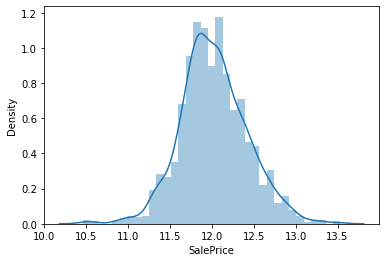

In [50]:
sns.distplot(HousingDF_Info['SalePrice']) 

In [51]:
# correlation matrix
cor = HousingDF_Info_numeric.corr()
cor 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,...,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


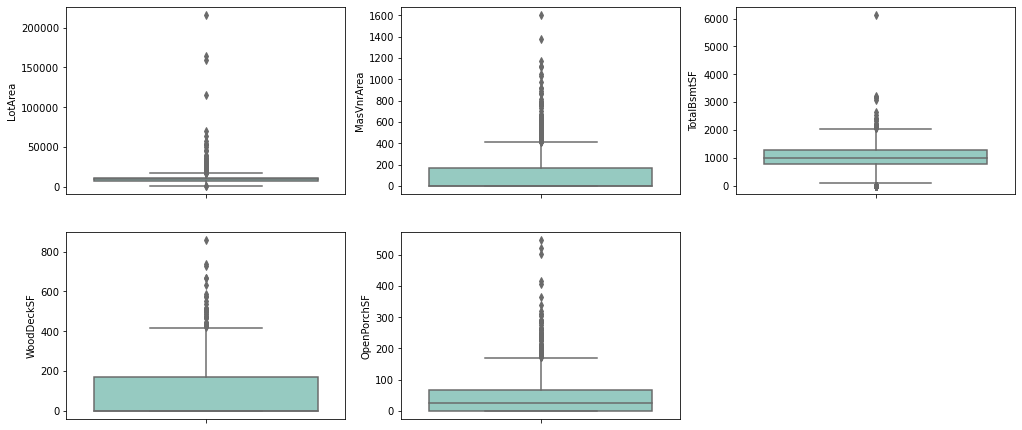

In [52]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = HousingDF_Info)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = HousingDF_Info)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = HousingDF_Info)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = HousingDF_Info)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = HousingDF_Info)
plt.show() 

In [57]:
# Determine the percentage of data retained

num_data = round(100*(len(HousingDF_Info)/1460),2)
print(num_data)  

100.0


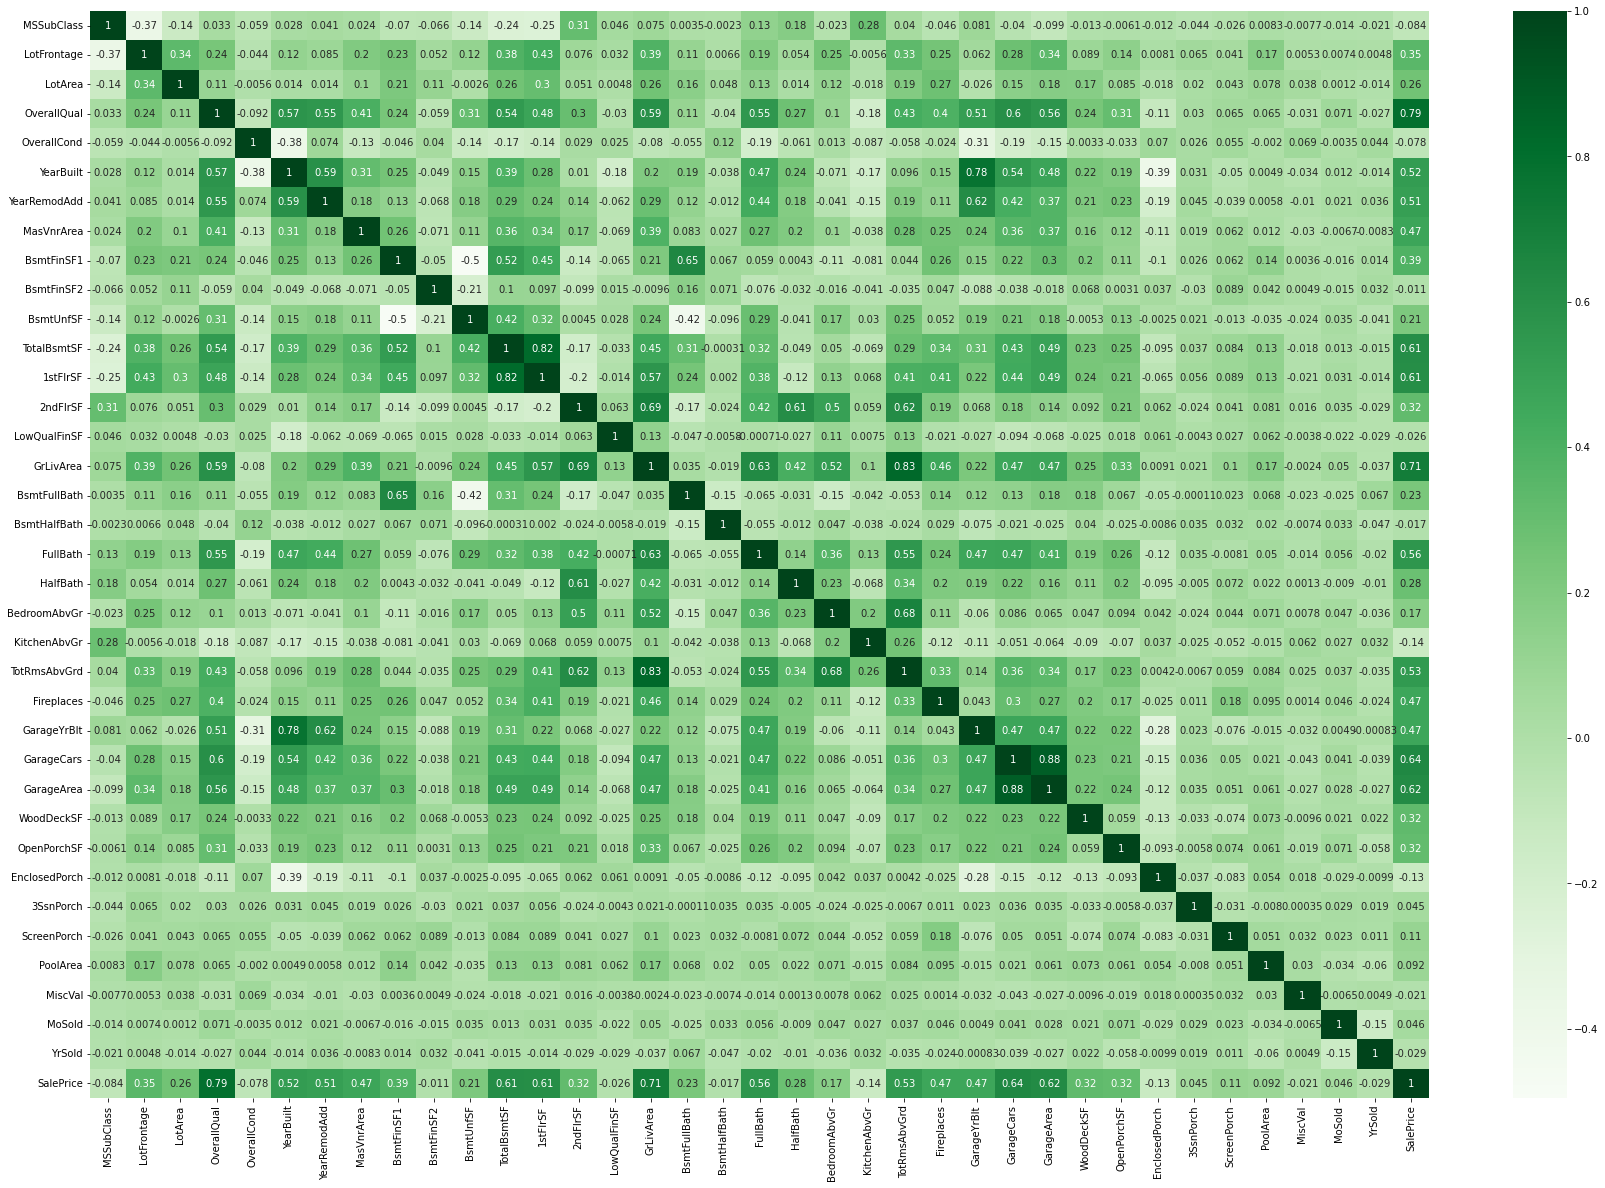

In [58]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="Greens", annot=True)
plt.show() 

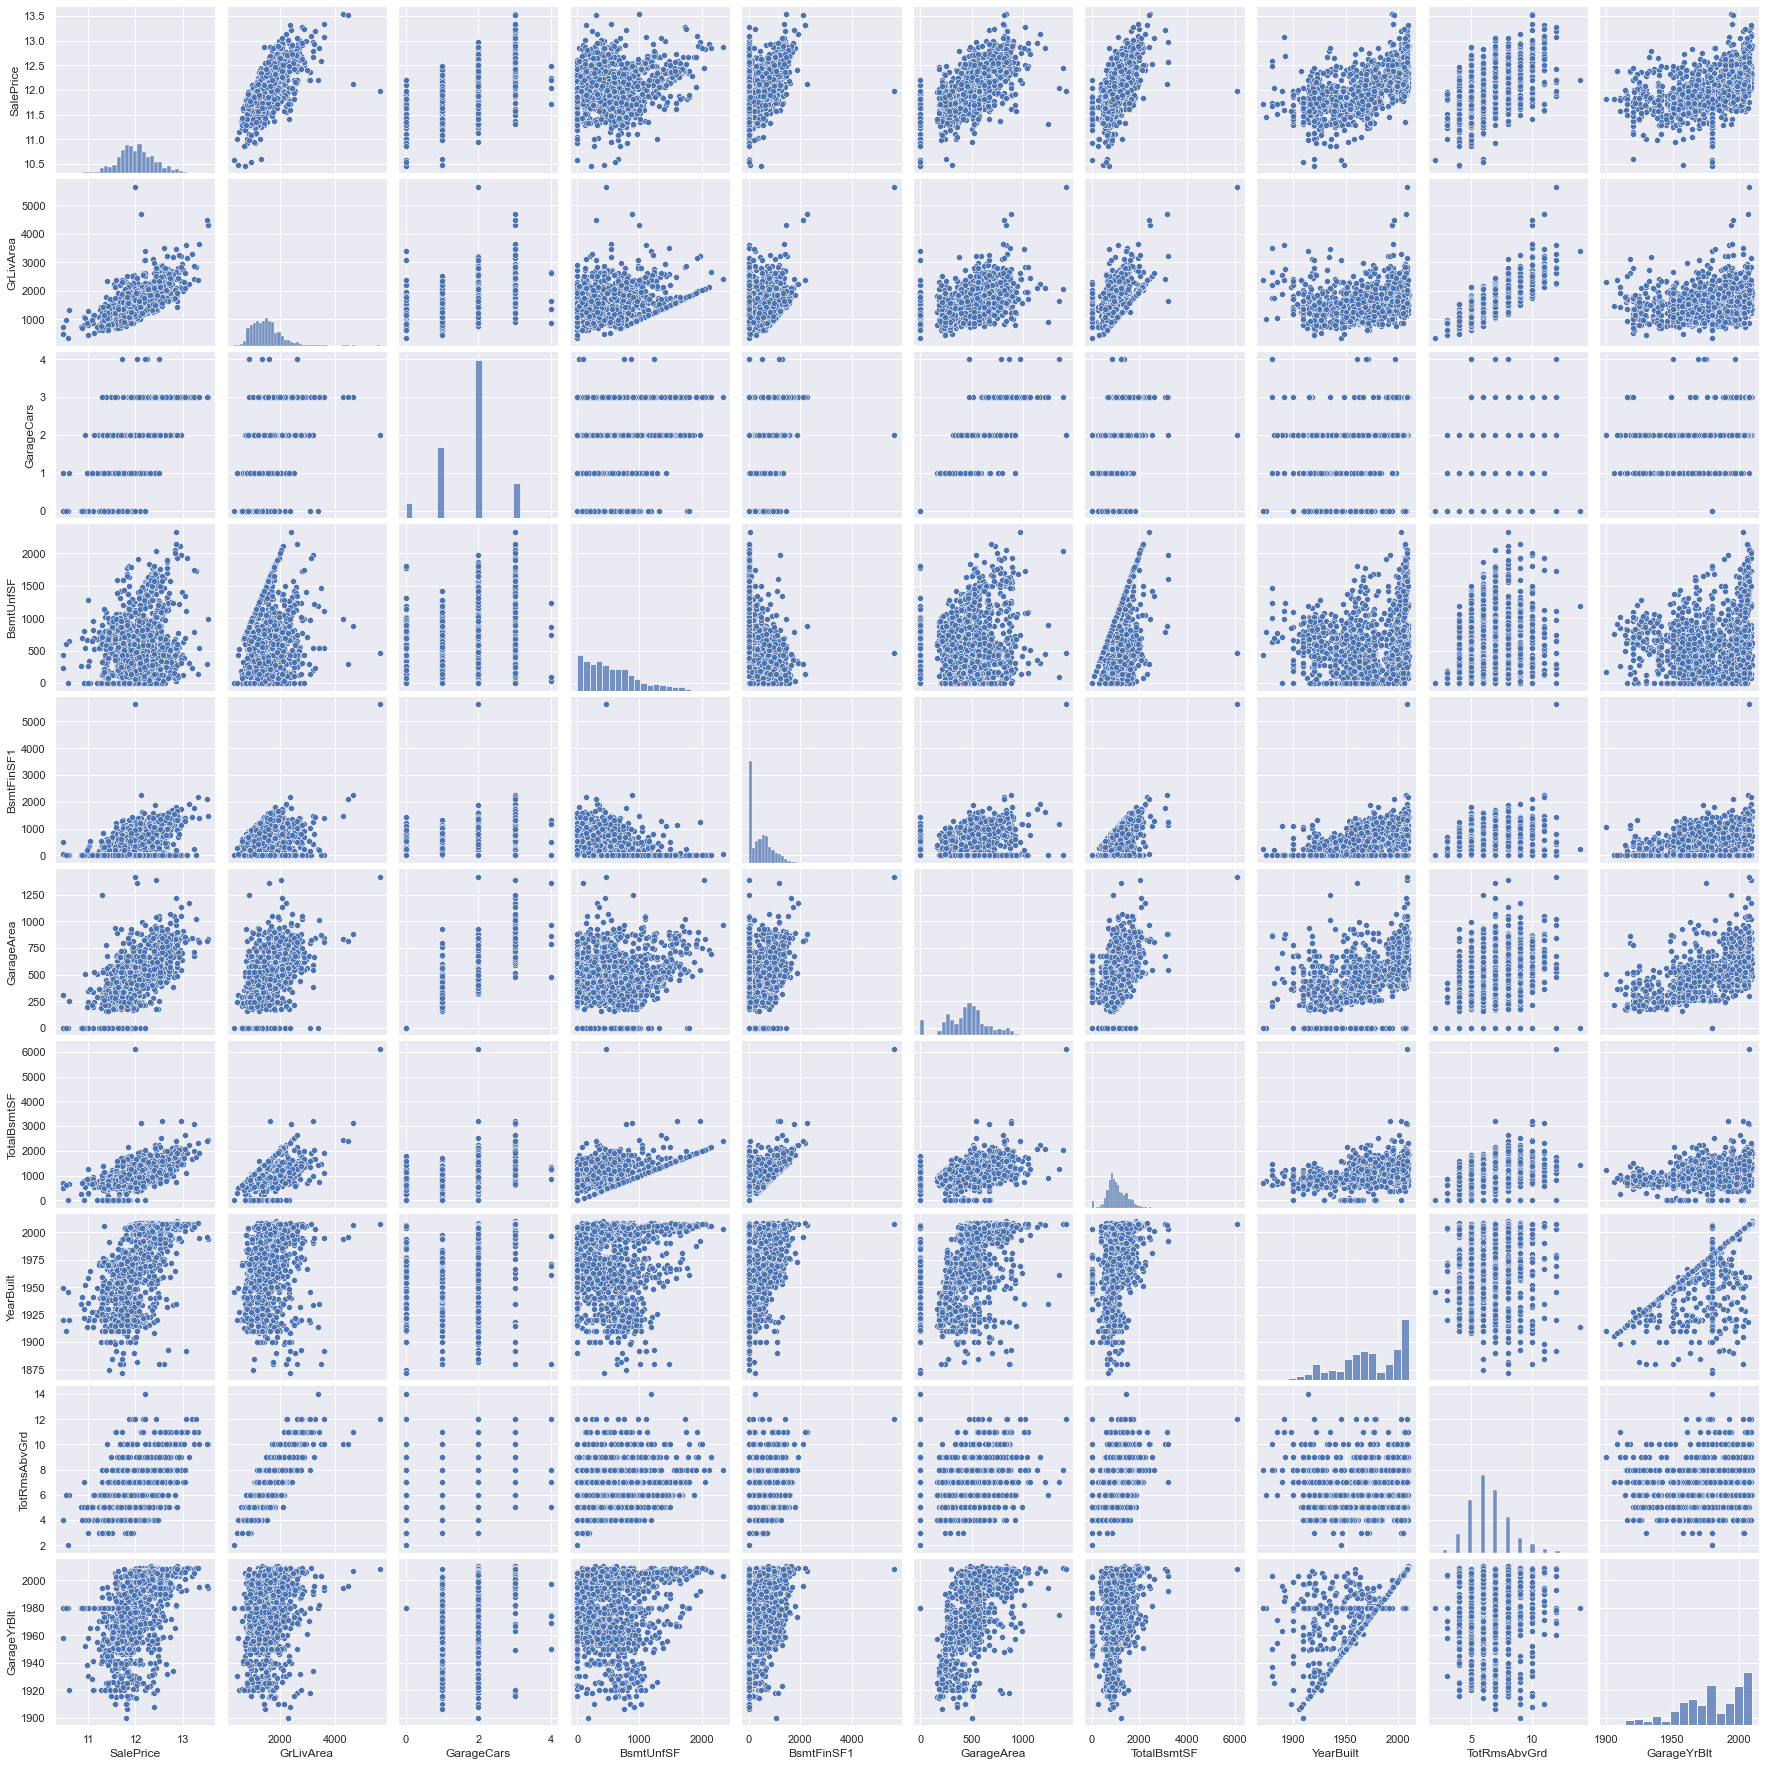

In [59]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(HousingDF_Info[cols], size = 2.5)
plt.show() 

In [60]:
## Step 4: Data Preparation
#Drop columns that are correlated and not contributing to 'SalePrice'

HousingDF_Info = HousingDF_Info.drop(['GarageCars'], axis = 1)
HousingDF_Info = HousingDF_Info.drop(['BsmtUnfSF'], axis = 1)
HousingDF_Info = HousingDF_Info.drop(['TotRmsAbvGrd'], axis = 1)
HousingDF_Info = HousingDF_Info.drop(['GarageYrBlt'], axis = 1)    

HousingDF_Info.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,12,2008,WD,Normal,12.429220


In [61]:
#Numeric columns
HousingDF_Info.select_dtypes(exclude=['object']) 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,12.072547
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,12.254868
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,12.493133
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,11.864469


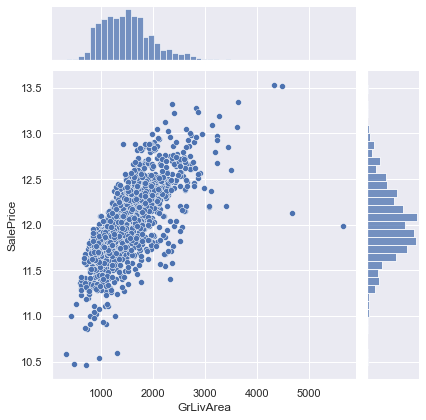

In [62]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=HousingDF_Info)
plt.show() 

In [63]:
# Removing some outliers on lower right side of 'GrLivArea'
HousingDF_Info = remove_outliers(HousingDF_Info,'GrLivArea') 

In [64]:
#Since the dataset is small it isn't advisable to do remove outliers.
HousingDF_Info.shape 

(1429, 77)

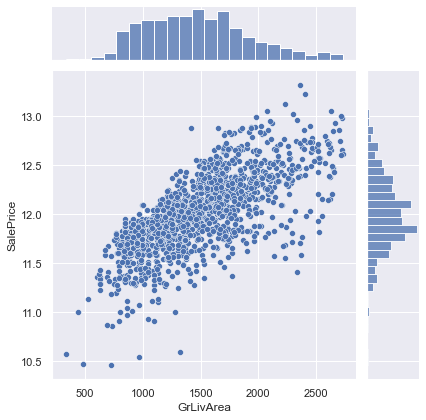

In [65]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = HousingDF_Info['GrLivArea'], y = HousingDF_Info['SalePrice'])
plt.show() 

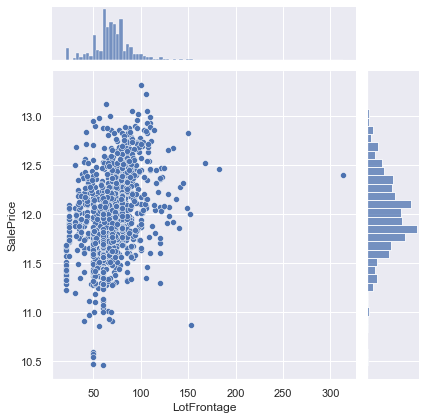

In [66]:
# Lot frontage vs SalePrice 
sns.jointplot(x = HousingDF_Info['LotFrontage'], y = HousingDF_Info['SalePrice'])
plt.show() 

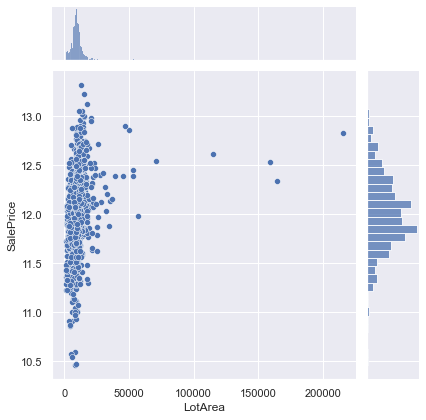

In [67]:
# LotArea vs SalePrice
sns.jointplot(x = HousingDF_Info['LotArea'], y = HousingDF_Info['SalePrice'])
plt.show() 

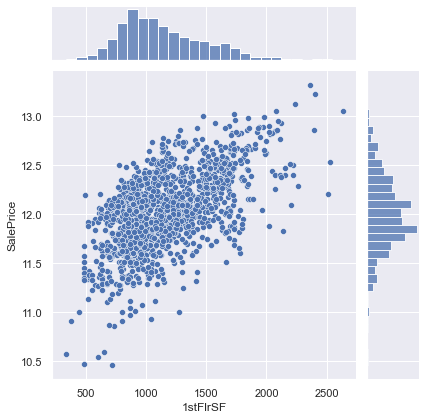

In [68]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = HousingDF_Info['1stFlrSF'], y = HousingDF_Info['SalePrice'])
plt.show() 

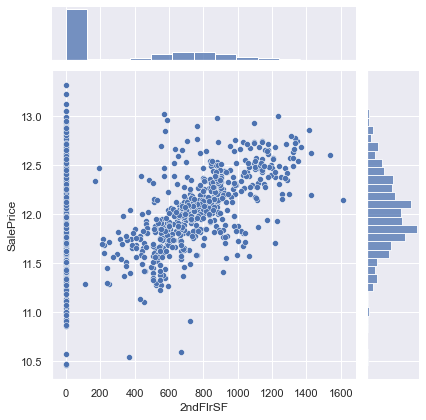

In [69]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = HousingDF_Info['2ndFlrSF'], y = HousingDF_Info['SalePrice'])
plt.show() 

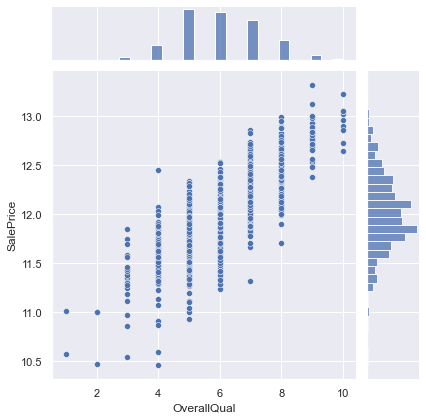

In [70]:
# OverallQual vs SalePrice
sns.jointplot(x = HousingDF_Info['OverallQual'], y = HousingDF_Info['SalePrice'])
plt.show() 

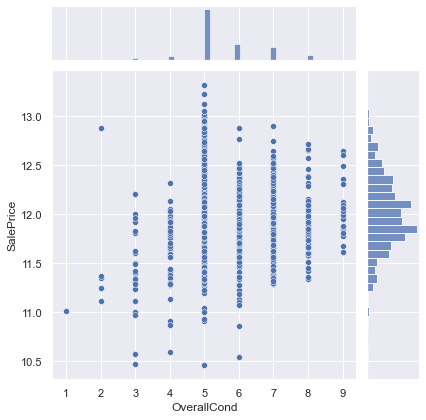

In [71]:
# OverallCond vs SalePrice
sns.jointplot(x=HousingDF_Info['OverallCond'], y = HousingDF_Info['SalePrice'])
plt.show() 

In [72]:
#We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'
# PropAge -  Property Age from yearsold - yearbuilt
HousingDF_Info['PropAge'] = (HousingDF_Info['YrSold'] - HousingDF_Info['YearBuilt'])
HousingDF_Info.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,12,2008,WD,Normal,12.429220,8


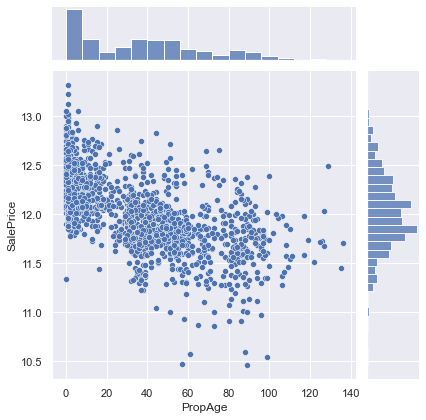

In [73]:
# PropAge vs SalePrice
sns.jointplot(x = HousingDF_Info['PropAge'], y = HousingDF_Info['SalePrice'])
plt.show() 

In [74]:
# Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further

HousingDF_Info.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,12,2008,WD,Normal,12.429220,8


In [75]:
HousingDF_Info = HousingDF_Info.drop(['MoSold'], axis = 1)
HousingDF_Info = HousingDF_Info.drop(['YrSold'], axis = 1)
HousingDF_Info = HousingDF_Info.drop(['YearBuilt'], axis = 1)
HousingDF_Info = HousingDF_Info.drop(['YearRemodAdd'], axis = 1)
HousingDF_Info.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.429220,8


In [76]:
HousingDF_Info.Street.value_counts() 

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [77]:
HousingDF_Info.Utilities.value_counts() 

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

In [78]:
# We can also drop columns that show very low variance and thus not required for predictions
HousingDF_Info = HousingDF_Info.drop(['Street'], axis = 1)
HousingDF_Info = HousingDF_Info.drop(['Utilities'], axis = 1) 

In [79]:
#just check varriance:  l1 = ['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional']
l2= HousingDF_Info.select_dtypes(include=['float64', 'int64'])
l2 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropAge
0,1,60,65.0,8450,7,5,196.0,706,0,856,...,548,0,61,0,0,0,0,0,12.247699,5
1,2,20,80.0,9600,6,8,0.0,978,0,1262,...,460,298,0,0,0,0,0,0,12.109016,31
2,3,60,68.0,11250,7,5,162.0,486,0,920,...,608,0,42,0,0,0,0,0,12.317171,7
3,4,70,60.0,9550,7,5,0.0,216,0,756,...,642,0,35,272,0,0,0,0,11.849405,91
4,5,60,84.0,14260,8,5,350.0,655,0,1145,...,836,192,84,0,0,0,0,0,12.429220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,0.0,0,0,953,...,460,0,40,0,0,0,0,0,12.072547,8
1456,1457,20,85.0,13175,6,6,119.0,790,163,1542,...,500,349,0,0,0,0,0,0,12.254868,32
1457,1458,70,66.0,9042,7,9,0.0,275,0,1152,...,252,0,60,0,0,0,0,2500,12.493133,69
1458,1459,20,68.0,9717,5,6,0.0,49,1029,1078,...,240,366,0,112,0,0,0,0,11.864469,60


In [80]:
for i in l2:
    print(HousingDF_Info[i].value_counts()) 

1       1
956     1
977     1
976     1
975     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: Id, Length: 1429, dtype: int64
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
33.0       1
150.0      1
38.0       1
111.0      1
46.0       1
Name: LotFrontage, Length: 112, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: LotArea, Length: 1047, dtype: int64
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: OverallCond, dtype: int64
0.0      856
72.0       8
108.0      8
180.0      

In [81]:
HousingDF_Info = HousingDF_Info.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1) 

In [82]:
#These Columns were having high null values, some of which were imputed. After imputing, it was found that there was very little variance in the data. So we have decided to drop these columns.
HousingDF_Info.shape 

(1429, 63)

In [83]:
#Data Preparation
# Drop 'Id' from Dataframe

HousingDF_Info = HousingDF_Info.drop(['Id'], axis=1)
HousingDF_Info.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,none,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,none,WD,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,none,WD,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,none,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,none,WD,Normal,12.429220,8


In [84]:
#type of each feature in data: int, float, object
types = HousingDF_Info.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object] 

In [85]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts() 

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [86]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns) 

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [87]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns) 

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [88]:
## Creating Dummy columns to convert categorical into numerical
HousingDF_Info = pd.get_dummies(HousingDF_Info, drop_first=True )
HousingDF_Info.head() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [89]:
X = HousingDF_Info.drop(['SalePrice'], axis=1)

X.head() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [90]:
# Putting response variable to y
y = HousingDF_Info['SalePrice']

y.head() 

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [91]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50) 

In [92]:
from sklearn.preprocessing import StandardScaler 

In [93]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']]) 

In [94]:
X_train.head() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
11,0.085645,0.746261,0.154684,2.241710,-0.513939,1.145212,1.323938,-0.300737,0.345478,0.113320,...,0,0,1,0,0,0,0,0,0,1
1070,-0.869945,0.130905,-0.020017,-0.764271,-0.513939,0.152993,0.360916,-0.300737,0.030191,-0.267693,...,0,0,0,0,1,0,0,0,1,0
513,-0.869945,0.083570,-0.115156,-0.012775,-0.513939,-0.564274,-0.223442,-0.300737,0.119563,-0.176705,...,0,0,0,0,1,0,0,0,1,0
467,0.324542,0.462250,-0.086269,-0.764271,1.258264,0.774624,-0.106571,-0.300737,-0.764234,-0.722635,...,0,0,0,0,1,0,0,0,1,0
993,0.085645,-0.058435,-0.148775,-0.012775,-0.513939,-0.564274,-1.008820,-0.300737,-0.709617,-1.115022,...,0,0,1,0,0,0,0,0,0,1


In [95]:
X_test.head() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
461,0.282163,-0.495702,-0.339155,0.620334,3.325664,-0.606456,-0.211663,0.997135,-1.205047,-1.556925,...,0,0,0,0,1,0,0,0,1,0
335,3.002345,0.729276,17.009026,-0.825989,0.435637,-0.606456,1.881258,0.620602,1.075768,1.258064,...,0,0,0,0,1,0,0,0,1,0
200,-0.851246,0.484280,-0.190859,-1.549150,-0.527705,-0.606456,-1.026482,-0.257974,0.157612,-0.084718,...,0,0,0,0,1,0,0,0,1,0
214,0.055482,-0.005711,0.068493,-0.102827,1.398980,0.272709,-0.146477,-0.257974,-0.891708,-1.249541,...,0,0,0,0,1,0,0,0,1,0
1003,0.735527,0.484280,0.134598,-0.825989,0.435637,0.335917,-1.026482,-0.257974,1.515413,1.422541,...,0,0,0,0,1,0,0,0,1,0


In [96]:
##3. Model Building and Evaluation
#Lets first check the model using Linear Regression and RFE (OPTIONAL)

# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [110]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=100)
rfe.fit(X_train, y_train) 

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [104]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

   

In [100]:
import sklearn
print(sklearn.__version__) 

1.0.2


In [111]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) 

[('MSSubClass', False, 28),
 ('LotFrontage', False, 84),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 98),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 86),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 56),
 ('BsmtHalfBath', False, 108),
 ('FullBath', False, 80),
 ('HalfBath', False, 71),
 ('BedroomAbvGr', False, 105),
 ('KitchenAbvGr', False, 101),
 ('Fireplaces', False, 104),
 ('GarageArea', False, 6),
 ('WoodDeckSF', False, 47),
 ('OpenPorchSF', False, 111),
 ('EnclosedPorch', False, 55),
 ('3SsnPorch', False, 88),
 ('ScreenPorch', False, 50),
 ('PoolArea', False, 79),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 95),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 110),
 ('LandContour_HLS', False, 48),
 

In [112]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col 

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_VinylSd',
       

In [113]:
X_train.columns[~rfe.support_] 

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       ...
       'GarageFinish_Unf', 'GarageQual_Gd', 'GarageQual_Po', 'PavedDrive_Y',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=110)

In [114]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col] 

In [115]:
X_train_rfe.head() 

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,PropAge,...,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
11,0.154684,2.241710,-0.513939,1.323938,0.345478,0.113320,1.995226,-0.111211,1.923409,-1.209026,...,0,0,1,0,0,0,0,0,0,1
1070,-0.020017,-0.764271,-0.513939,0.360916,0.030191,-0.267693,-0.769750,-0.111211,-0.932170,0.445587,...,0,0,1,0,0,0,0,0,1,0
513,-0.115156,-0.012775,-0.513939,-0.223442,0.119563,-0.176705,-0.769750,-0.111211,-0.860557,-0.447904,...,0,0,1,0,0,0,0,0,1,0
467,-0.086269,-0.764271,1.258264,-0.106571,-0.764234,-0.722635,1.060654,-0.111211,0.401627,0.908879,...,0,0,1,0,0,0,0,0,1,0
993,-0.148775,-0.012775,-0.513939,-1.008820,-0.709617,-1.115022,1.046127,-0.111211,0.079368,-1.209026,...,0,0,1,0,0,0,0,0,0,1


In [116]:
X_train_rfe.shape 

(1000, 100)

In [123]:
# predict
lm = LinearRegression()
rfe.fit(X_train, y_train) 

y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred) 
 

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [125]:
lm = LinearRegression()
rfe.fit(X_test, y_test)
  

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [127]:
y_test_pred = lm.predict(X_test)
 

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [128]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_)) 

[('MSSubClass', False, 27),
 ('LotFrontage', False, 52),
 ('LotArea', True, 1),
 ('OverallQual', False, 16),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 59),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 107),
 ('TotalBsmtSF', False, 8),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 30),
 ('BsmtHalfBath', False, 106),
 ('FullBath', False, 24),
 ('HalfBath', False, 26),
 ('BedroomAbvGr', False, 77),
 ('KitchenAbvGr', False, 110),
 ('Fireplaces', False, 31),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 42),
 ('OpenPorchSF', False, 104),
 ('EnclosedPorch', False, 103),
 ('3SsnPorch', False, 43),
 ('ScreenPorch', False, 48),
 ('PoolArea', True, 1),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 100),
 ('LotShape_IR3', False, 62),
 ('LotShape_Reg', False, 75),
 ('LandContour_HLS', False, 61),

In [129]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1 

Index(['LotArea', 'OverallCond', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'PoolArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_FR2', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAe', 'BldgType_Duplex',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Ex

In [130]:
X_test_rfe = X_test[col1] 

In [131]:
X_test_rfe.head() 

,LotArea,OverallCond,BsmtFinSF1,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,PoolArea,PropAge,...,MiscFeature_none,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
461,-0.339155,3.325664,-0.211663,-1.556925,0.506037,-0.09698,-0.813247,0.530538,0.0,1.326790,...,1,0,0,0,0,0,0,0,1,0
335,17.009026,0.435637,1.881258,1.258064,-0.435654,-0.09698,0.616745,0.299231,0.0,0.303675,...,0,0,0,0,0,0,0,0,1,0
200,-0.190859,-0.527705,-1.026482,-0.084718,-0.835813,-0.09698,-0.843999,-0.138775,0.0,-0.924063,...,1,0,0,0,0,0,0,0,1,0
214,0.068493,1.398980,-0.146477,-1.249541,0.848688,-0.09698,-0.248718,-0.832694,0.0,-0.037363,...,0,0,0,0,0,0,0,0,1,0
1003,0.134598,0.435637,-1.026482,1.422541,-0.835813,-0.09698,0.383905,0.294310,0.0,-0.105571,...,1,0,0,0,0,0,0,0,1,0


In [132]:
##### Lasso and Ridge Regression

#LASSO REGRESSION:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape) 

X_train (1000, 210)
y_train (1000,)


In [133]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [134]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head() 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.098643,0.012559,0.002994,0.001100,0.0001,{'alpha': 0.0001},-0.089702,-0.078848,-0.088372,-0.085734,...,-0.083955,0.005070,2,-0.065801,-0.068092,-0.065346,-0.066311,-0.067607,-0.066631,0.001052
1,0.022243,0.003780,0.002993,0.001093,0.001,{'alpha': 0.001},-0.082755,-0.083177,-0.087933,-0.082553,...,-0.083213,0.002670,1,-0.075478,-0.077009,-0.074278,-0.076496,-0.076136,-0.075880,0.000943
2,0.008577,0.001197,0.002593,0.000489,0.01,{'alpha': 0.01},-0.090790,-0.093399,-0.097715,-0.092036,...,-0.092514,0.003038,3,-0.091236,-0.090420,-0.089019,-0.090524,-0.091156,-0.090471,0.000796
3,0.007980,0.000892,0.002792,0.000399,0.05,{'alpha': 0.05},-0.129246,-0.113828,-0.132264,-0.112722,...,-0.120237,0.008648,4,-0.119298,-0.118718,-0.117623,-0.118882,-0.119586,-0.118822,0.000673
4,0.007181,0.001466,0.003192,0.000978,0.1,{'alpha': 0.1},-0.172055,-0.148653,-0.168033,-0.143888,...,-0.155762,0.011827,5,-0.155429,-0.155643,-0.153254,-0.153682,-0.156270,-0.154856,0.001174


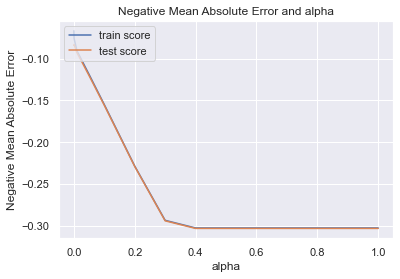

In [135]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show() 

In [136]:
## >> From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,
#but we will choose a low value of alpha to balance the trade-off between Bias-Variance
#and to get the coefficients of smallest of features. 

In [137]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_ 

array([-0.00698318,  0.01385863,  0.01530092,  0.11219857,  0.04956005,
        0.        ,  0.03451586,  0.        ,  0.04155321,  0.        ,
        0.        , -0.        ,  0.12480705,  0.00976136,  0.        ,
        0.        ,  0.        , -0.        , -0.00805575,  0.02372561,
        0.033997  ,  0.00962824,  0.        ,  0.        ,  0.        ,
        0.00541322,  0.        , -0.0953824 ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

In [138]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters)) 

[('constant', 12.003),
 ('MSSubClass', -0.007),
 ('LotFrontage', 0.014),
 ('LotArea', 0.015),
 ('OverallQual', 0.112),
 ('OverallCond', 0.05),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.035),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.042),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.125),
 ('BsmtFullBath', 0.01),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.008),
 ('Fireplaces', 0.024),
 ('GarageArea', 0.034),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', 0.0),
 ('PropAge', -0.095),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -0.0)

In [139]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)) 

0.8854624158407248
0.8894603158029368


In [140]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))) 

RMSE : 0.12573595366706636


In [168]:
#### The R2 values for Train and Test matches well, indicating an optimum model
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters)) 
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))    

0.015809530044566658

In [142]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head() 

,Variable,Coeff
0,constant,12.003
1,MSSubClass,-0.007
2,LotFrontage,0.014
3,LotArea,0.015
4,OverallQual,0.112


In [143]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para 

,Variable,Coeff
0,constant,12.003
13,GrLivArea,0.125
4,OverallQual,0.112
5,OverallCond,0.050
9,TotalBsmtSF,0.042
...,...,...
210,SaleCondition_Partial,0.000
173,KitchenQual_TA,-0.007
1,MSSubClass,-0.007
19,KitchenAbvGr,-0.008


In [144]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred 

,Variable,Coeff
0,constant,12.003
13,GrLivArea,0.125
4,OverallQual,0.112
5,OverallCond,0.050
9,TotalBsmtSF,0.042
7,BsmtFinSF1,0.035
21,GarageArea,0.034
20,Fireplaces,0.024
3,LotArea,0.015
2,LotFrontage,0.014


In [145]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape 

(17, 2)

In [146]:
Lassso_var = list(pred['Variable'])
print(Lassso_var) 

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'WoodDeckSF', 'ScreenPorch', 'KitchenQual_TA', 'MSSubClass', 'KitchenAbvGr', 'PropAge']


In [147]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head() 

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
11,1.923409,2.241710,-0.513939,0.345478,1.267298,1.323938,2.231812,0.154684,0.746261,1.131973,1,-0.351334,2.754667,-0.268919,0.485675
1070,-0.932170,-0.764271,-0.513939,0.030191,-0.857140,0.360916,-0.918240,-0.020017,0.130905,1.131973,0,-0.368801,-0.990631,3.351363,-0.758474
513,-0.860557,-0.012775,-0.513939,0.119563,0.077613,-0.223442,-0.918240,-0.115156,0.083570,-0.816345,1,-0.718144,-0.990631,-0.268919,0.257158
467,0.401627,-0.764271,1.258264,-0.764234,-0.734395,-0.106571,2.231812,-0.086269,0.462250,-0.816345,0,-0.718144,-0.990631,-0.268919,0.663411
993,0.079368,-0.012775,-0.513939,-0.709617,0.455291,-1.008820,-0.918240,-0.148775,-0.058435,-0.816345,1,-0.106794,0.882018,-0.268919,-0.758474


In [148]:
 X_train_lasso.shape

(1000, 15)

In [149]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head() 

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
461,-0.813247,0.620334,3.325664,-1.205047,0.530538,-0.211663,-0.988037,-0.339155,-0.495702,1.073876,1,-0.747921,-1.099305,-0.27671,1.165362
335,0.616745,-0.825989,0.435637,1.075768,0.299231,1.881258,2.151725,17.009026,0.729276,2.969732,0,-0.747921,0.802316,-0.27671,4.227488
200,-0.843999,-1.549150,-0.527705,0.157612,-0.138775,-1.026482,-0.988037,-0.190859,0.484280,-0.821980,1,0.135073,0.802316,-0.27671,0.248203
214,-0.248718,-0.102827,1.398980,-0.891708,-0.832694,-0.146477,-0.988037,0.068493,-0.005711,-0.821980,0,-0.251236,-1.099305,-0.27671,-0.728127
1003,0.383905,-0.825989,0.435637,1.515413,0.294310,-1.026482,-0.988037,0.134598,0.484280,-0.821980,0,-0.747921,0.802316,-0.27671,-0.728127


In [150]:
##### Ridge Regression

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [151]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head() 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010374,0.002568,0.003798,0.000749,0.0001,{'alpha': 0.0001},-0.098827,-0.080586,-0.093923,-0.093385,...,-0.089726,0.007190,26,-0.063890,-0.066811,-0.062901,-0.064702,-0.065821,-0.064825,0.001380
1,0.011572,0.002410,0.004985,0.001094,0.001,{'alpha': 0.001},-0.098810,-0.080580,-0.093891,-0.093357,...,-0.089703,0.007188,25,-0.063891,-0.066811,-0.062903,-0.064704,-0.065823,-0.064826,0.001380
2,0.009133,0.002115,0.003391,0.001017,0.01,{'alpha': 0.01},-0.098639,-0.080523,-0.093591,-0.093089,...,-0.089491,0.007154,24,-0.063904,-0.066811,-0.062931,-0.064715,-0.065846,-0.064842,0.001374
3,0.008779,0.000978,0.003291,0.000597,0.05,{'alpha': 0.05},-0.097945,-0.080315,-0.092583,-0.092083,...,-0.088811,0.006922,23,-0.063979,-0.066830,-0.063098,-0.064761,-0.065935,-0.064921,0.001335
4,0.008701,0.001671,0.003774,0.000395,0.1,{'alpha': 0.1},-0.097200,-0.080133,-0.091735,-0.091160,...,-0.088212,0.006658,22,-0.064088,-0.066874,-0.063300,-0.064818,-0.066043,-0.065025,0.001292


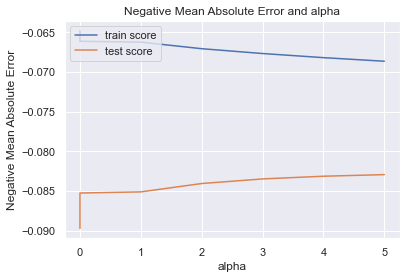

In [152]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show() 

In [153]:
#since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_ 
 

array([-0.01661814,  0.00879344,  0.02534461,  0.06457657,  0.05124942,
       -0.00169877,  0.0304906 ,  0.00747482,  0.03650081,  0.03991915,
        0.04767425,  0.00523671,  0.07595503,  0.01170416, -0.00092158,
        0.00892371,  0.01249545,  0.0003776 , -0.00534099,  0.00350875,
        0.02078896,  0.01348507, -0.0010637 ,  0.01230575,  0.00491464,
        0.0141215 ,  0.00971184, -0.0702245 ,  0.14857807,  0.10523788,
        0.12502615,  0.09704995,  0.00219378, -0.0208621 ,  0.00027408,
        0.01235864, -0.02072982,  0.00302972,  0.01744635, -0.02148039,
       -0.05117096, -0.02397809,  0.01020923, -0.03899013, -0.0150698 ,
       -0.02340803,  0.00931668,  0.03728476, -0.00759928,  0.11394039,
       -0.05593223, -0.00971649, -0.08597375, -0.11266515, -0.04195278,
       -0.01867322,  0.04765164, -0.02093394,  0.03560318,  0.04414944,
       -0.0527455 , -0.04663915, -0.00821161,  0.00358752,  0.02349391,
        0.09259274, -0.00371216,  0.03744706,  0.01443113,  0.06

In [154]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters)) 

[('constant', 11.739),
 ('MSSubClass', -0.017),
 ('LotFrontage', 0.009),
 ('LotArea', 0.025),
 ('OverallQual', 0.065),
 ('OverallCond', 0.051),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.007),
 ('TotalBsmtSF', 0.037),
 ('1stFlrSF', 0.04),
 ('2ndFlrSF', 0.048),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.076),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.009),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.005),
 ('Fireplaces', 0.004),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.01),
 ('PropAge', -0.07),
 ('MSZoning_FV', 0.149),
 ('MSZoning_RH', 0.105),
 ('MSZoning_RL', 0.125),
 ('MSZoning_RM', 0.097),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', -0.021),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.012),
 ('LandContour_Low', -0.021),
 ('LandContour_Lvl', 0.003),
 ('LotConfig_CulDSac', 0.017),
 ('LotCo

In [155]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)) 

0.9364594823911133
0.9077597079466581


In [156]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))) 

RMSE : 0.11485785595060997


In [157]:
# >> It is visible that the model performance is better than Lasso. The train and the test scores are matching well 

In [158]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters)) 

In [159]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20) 

,Variable,Coeff
0,constant,11.739
29,MSZoning_FV,0.149
31,MSZoning_RL,0.125
50,Neighborhood_Crawfor,0.114
30,MSZoning_RH,0.105
32,MSZoning_RM,0.097
210,SaleCondition_Partial,0.097
66,Neighborhood_StoneBr,0.093
13,GrLivArea,0.076
209,SaleCondition_Normal,0.074


In [160]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE 

,Variable,Coeff
0,constant,11.739
29,MSZoning_FV,0.149
31,MSZoning_RL,0.125
50,Neighborhood_Crawfor,0.114
30,MSZoning_RH,0.105
...,...,...
173,KitchenQual_TA,-0.080
53,Neighborhood_IDOTRR,-0.086
94,Exterior1st_BrkComm,-0.096
83,HouseStyle_2.5Fin,-0.100


In [161]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE 

,Variable,Coeff
0,constant,11.739
29,MSZoning_FV,0.149
31,MSZoning_RL,0.125
50,Neighborhood_Crawfor,0.114
30,MSZoning_RH,0.105
...,...,...
173,KitchenQual_TA,-0.080
53,Neighborhood_IDOTRR,-0.086
94,Exterior1st_BrkComm,-0.096
83,HouseStyle_2.5Fin,-0.100


In [162]:
predRFE.shape 

(204, 2)

In [163]:
#Observation:
#1. Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
#2. It is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables.
#3. It is always advisable to use simple yet robust model.
#4. Equation can be formulated using the features and coefficients obtained by Lasso 

In [164]:
### Assign the Features as x1, x2.....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']), inplace = True) 
pred 

,Variable,Coeff
C,constant,12.003
x1,GrLivArea,0.125
x2,OverallQual,0.112
x3,OverallCond,0.050
x4,TotalBsmtSF,0.042
x5,BsmtFinSF1,0.035
x6,GarageArea,0.034
x7,Fireplaces,0.024
x8,LotArea,0.015
x9,LotFrontage,0.014


In [167]:
#These are the final features that should be selected for predicting the price of house

#Hence the equation:
#Log(Y) = C + 0.125(x1) + 0.112(x2) + 0.050(x3) + 0.042(x4) + 0.035(x5) + 0.034(x6) + 0.024(x7) + 0.015(x8) + 0.014(x9) + 0.010(x10)+ 0.010(x11) + 0.005(x12) - 0.007(x13) - 0.007(x14) - 0.008(x15) - 0.095(x16) + Error term(RSS + alpha * (sum of absolute value of coefficients)
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test)) 

0.015809530044566658

In [ ]:
#Conclusion:
#Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.
#The higher values of positive coeeficients suggest a high sale value.

#The higher values of negative coeeficients suggest a decrease in sale value.
#The optimal lambda value in case of Ridge and Lasso is as below:

#Ridge RMSE - 0.11485785595060997
#Lasso RMSE - 0.12573595366706636
#The Mean Squared error in case of Ridge and Lasso are:

#Ridge - 0.015809530044566658
#Lasso - 0.015809530044566658
#The Mean Squared Error of Lasso is slightly lower than that of Ridge

#Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

#Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

.